# Lab 6: Sequence-to-sequence models

## Description:
For this lab, you will code up the [char-rnn model of Karpathy](http://karpathy.github.io/2015/05/21/rnn-effectiveness/). This is a recurrent neural network that is trained probabilistically on sequences of characters, and that can then be used to sample new sequences that are like the original.

This lab will help you develop several new skills, as well as understand some best practices needed for building large models. In addition, we'll be able to create networks that generate neat text!

## There are two parts of this lab:
###  1.   Wiring up a basic sequence-to-sequence computation graph
###  2.   Implementing your own GRU cell.


An example of my final samples are shown below (more detail in the
final section of this writeup), after 150 passes through the data.
Please generate about 15 samples for each dataset.

<code>
And ifte thin forgision forward thene over up to a fear not your
And freitions, which is great God. Behold these are the loss sub
And ache with the Lord hath bloes, which was done to the holy Gr
And appeicis arm vinimonahites strong in name, to doth piseling 
And miniquithers these words, he commanded order not; neither sa
And min for many would happine even to the earth, to said unto m
And mie first be traditions? Behold, you, because it was a sound
And from tike ended the Lamanites had administered, and I say bi
</code>


---

## Part 0: Readings, data loading, and high level training

---

There is a tutorial here that will help build out scaffolding code, and get an understanding of using sequences in pytorch.

* Read the following

> * [Pytorch sequence-to-sequence tutorial](https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html)
* [Understanding LSTM Networks](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)






In [48]:
! wget -O ./text_files.tar.gz 'https://piazza.com/redirect/s3?bucket=uploads&prefix=attach%2Fjlifkda6h0x5bk%2Fhzosotq4zil49m%2Fjn13x09arfeb%2Ftext_files.tar.gz' 
! tar -xzf text_files.tar.gz
! pip install unidecode
! pip install torch
import torch

def char_tensor(string):
  tensor = torch.zeros(len(string)).long()
  for c in range(len(string)):
      tensor[c] = all_characters.index(string[c])
  return tensor


--2019-10-17 18:31:56--  https://piazza.com/redirect/s3?bucket=uploads&prefix=attach%2Fjlifkda6h0x5bk%2Fhzosotq4zil49m%2Fjn13x09arfeb%2Ftext_files.tar.gz
Resolving piazza.com (piazza.com)... 52.45.119.166, 34.205.95.128, 3.214.17.10, ...
Connecting to piazza.com (piazza.com)|52.45.119.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://d1b10bmlvqabco.cloudfront.net/attach/jlifkda6h0x5bk/hzosotq4zil49m/jn13x09arfeb/text_files.tar.gz [following]
--2019-10-17 18:31:56--  https://d1b10bmlvqabco.cloudfront.net/attach/jlifkda6h0x5bk/hzosotq4zil49m/jn13x09arfeb/text_files.tar.gz
Resolving d1b10bmlvqabco.cloudfront.net (d1b10bmlvqabco.cloudfront.net)... 13.32.86.101, 13.32.86.19, 13.32.86.54, ...
Connecting to d1b10bmlvqabco.cloudfront.net (d1b10bmlvqabco.cloudfront.net)|13.32.86.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1533290 (1.5M) [application/x-gzip]
Saving to: ‘./text_files.tar.gz’

./text_files.tar.gz 100%[=====

In [0]:
# input_size = dimmension of vocab
# hidden_size = dimmension of embedding (hyperparameter)
# makes a lookup table where each row is a vector of length embedding for a character in the vocab
  # these values are trained
  # takes in a character like 'a' and returns the current embedding for that character.
  # that embedding becomes the input to the network

import unidecode
import string
import random
import re
import pdb
from torch.utils.data import Dataset, DataLoader

all_characters = string.printable
n_characters = len(all_characters)


class TextDataset(Dataset):
  def __init__(self, chunk_len=200, file_name='./text_files/lotr.txt'):
    self.chunk_len = chunk_len
    self.file = unidecode.unidecode(open(file_name).read())
    self.len = len(self.file)
  
  def __getitem__(self):
    pass
  
  def __len__(self):
    return self.len
  
  def random_training_set(self):    
    chunk = self.random_chunk(self.chunk_len)
    inp = char_tensor(chunk[:-1])
    target = char_tensor(chunk[1:])
    return inp, target
  
  def random_chunk(self, chunk_len):
    start_index = random.randint(0, self.len - chunk_len)
    end_index = start_index + chunk_len + 1
    return self.file[start_index:end_index]
  



---

## Part 4: Creating your own GRU cell 

**(Come back to this later - its defined here so that the GRU will be defined before it is used)**

---

The cell that you used in Part 1 was a pre-defined Pytorch layer. Now, write your own GRU class using the same parameters as the built-in Pytorch class does.

Please try not to look at the GRU cell definition. The answer is right there in the code, and in theory, you could just cut-and-paste it. This bit is on your honor!

**TODO:**
* Create a custom GRU cell

**DONE:**



In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class GRU(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers):
    super(GRU, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    
    self.sigmoid = nn.Sigmoid()
    self.tanh = nn.Tanh()

    
  
  def forward(self, inputs, hidden):
    # Each layer does the following:
    # r_t = sigmoid(W_ir*x_t + b_ir + W_hr*h_(t-1) + b_hr)
    # z_t = sigmoid(W_iz*x_t + b_iz + W_hz*h_(t-1) + b_hz)
    # n_t = tanh(W_in*x_t + b_in + r_t**(W_hn*h_(t-1) + b_hn))
    # h_(t) = (1 - z_t)**n_t + z_t**h_(t-1)
    # Where ** is hadamard product (not matrix multiplication, but elementwise multiplication)
    return inputs, hidden
#     return outputs, hiddens
  


---

##  Part 1: Building a sequence to sequence model

---

Great! We have the data in a useable form. We can switch out which text file we are reading from, and trying to simulate.

We now want to build out an RNN model, in this section, we will use all built in Pytorch pieces when building our RNN class.


**TODO:**
* Create an RNN class that extends from nn.Module.

**DONE:**



In [0]:
class RNN(nn.Module): #This is just a decoder. There is no encoder, because we just "decoding" the input string to determine the next character
  def __init__(self, input_size, hidden_size, output_size, n_layers=1):
    super(RNN, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size
    self.n_layers = n_layers
    
    self.embedding = nn.Embedding(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.gru = nn.GRU(hidden_size, hidden_size, n_layers)
#     self.gru = GRU(hidden_size, hidden_size, n_layers)
    self.out_layer = nn.Linear(hidden_size, output_size)

  def forward(self, input_char, hidden):
    embedding = self.embedding(input_char).view(1,1,-1)
    output, hidden = self.gru(embedding, hidden)
    out_decoded = self.relu(self.out_layer(output))
    
    return out_decoded, hidden

  def init_hidden(self):
    return torch.zeros(self.n_layers, 1, self.hidden_size)

---

## Part 2: Sample text and Training information

---

We now want to be able to train our network, and sample text after training.

This function outlines how training a sequence style network goes. 

**TODO:**
* Fill in the pieces.

**DONE:**




[5.422889471054077 (10 5%) 4.2995]
z
uKe acti_4G1L t@n?Gmtu>cK~{QBw;u>guu<d<1etrd
/
$ 



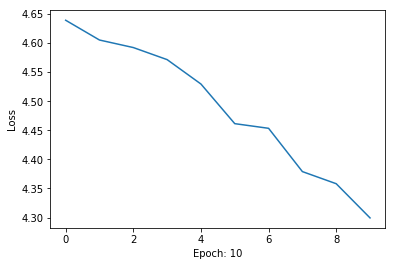

[18.145082712173462 (20 10%) 3.7774]
n dweast susa ar .
nwtoiwgr ollisotooegistn  gtnc.
ns aeane etnit
mtcow
nrostsiedlst 
tsgend aeatcos 



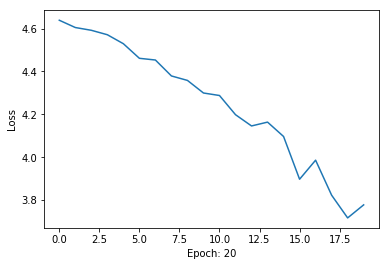

[38.19128441810608 (30 15%) 3.2333]
ttldostdawa soilwtrnfaalasaola ltlilb. re  asws iti trwtte dmind owc.welnomn ntradiawatseiosaucnun l 



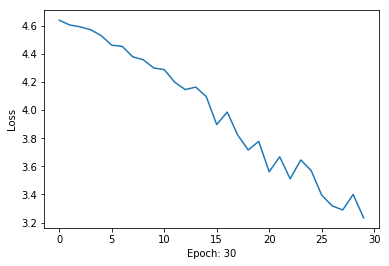

[66.54889297485352 (40 20%) 3.2098]
nmifs doolooeu n urutd olfrlliads. sodlee reeu tsogauccfsednt ai nins. bortgstnmuewalnims wwowwrtmam 



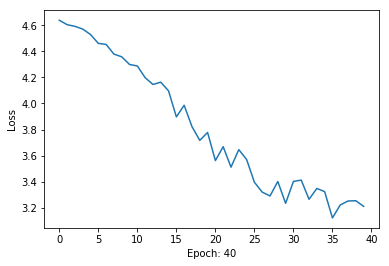

[103.60370922088623 (50 25%) 2.9891]
e ledgd r ie w .ro o
ustl wiaoistss glacbelumfcs f
erectanti
ttaolsw oes
eeitdanoisba elc otbfrmormb 



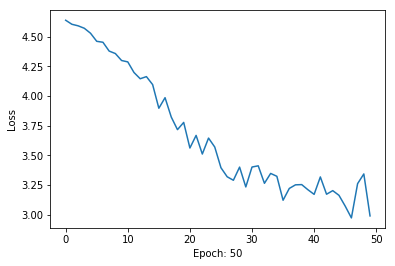

[148.29977869987488 (60 30%) 3.1214]
edn  
brlfmlwnaswdsfw ool mnseoaw rboewr glttansrtitbi ia atnleeniodlsswmfs 
frnlbmmm regurbdb wmwrn 



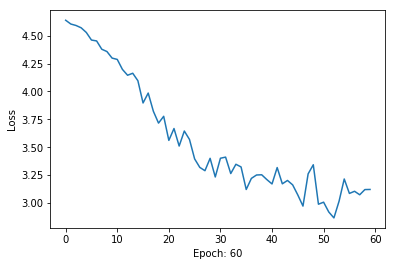

[200.4037172794342 (70 35%) 3.0050]
ga m.ar tt lagcdcdncol fwetudtd adu
wlio mmowfb ligctsroo. 
ewlo fircdsnerl ctoln
 t ooier dm wtibud 



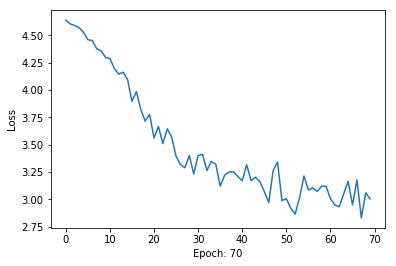

[258.94131207466125 (80 40%) 2.8586]
srudaugcwfilfcfdr  r onri .msrseids feu.asein 
stnocret siol barreldwc llnarfdobbgsitueeecsrwcmleors 



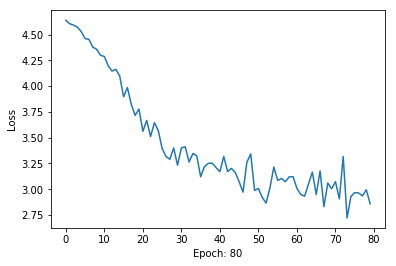

In [0]:
import time
from matplotlib import pyplot as plt

def train(n_layers, lr):
  hidden_size = n_characters
  in_size = n_characters
  out_size = n_characters
  file_name = './text_files/lotr.txt'
  train_dataset = TextDataset(file_name=file_name)
  decoder = RNN(in_size, hidden_size, out_size, n_layers=n_layers)
  optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
  objective = nn.CrossEntropyLoss()

  losses = []
  optimizer.zero_grad()
  hidden = decoder.init_hidden()
  n_epochs = 200
  print_every = 10
  start = time.time()
  running_loss = 0
  for epoch in range(1, n_epochs + 1):
    running_loss = 0
    optimizer.zero_grad()
    input_string, target_string = train_dataset.random_training_set()
    for char, target_char in zip(input_string, target_string):
      out_char, hidden = decoder(char, hidden)
      running_loss += objective(out_char.squeeze(0), target_char.unsqueeze(0))
    loss = running_loss / len(target_string)
    losses.append(running_loss / len(target_string))
    running_loss.backward(retain_graph=True)
    optimizer.step()

    if epoch % print_every == 0:
        print('[%s (%d %d%%) %.4f]' % (time.time() - start, epoch, epoch / n_epochs * 100, loss))
        print(evaluate(decoder, 'Wh', 100), '\n')

    if epoch % print_every == 0:
#         losses.append(running_loss / plot_every)
        plt.plot(range(len(losses)), losses)
        plt.xlabel("Epoch: {}".format(epoch))
        plt.ylabel("Loss")
        plt.show()
#         running_loss = 0
         

 
      
      
train(1, .001)

---

## Part 3: Sample text and Training information

---

You can at this time, if you choose, also write out your train loop boilerplate that samples random sequences and trains your RNN. This will be helpful to have working before writing your own GRU class.

If you are finished training, or during training, and you want to sample from the network you may consider using the following function. If your RNN model is instantiated as `decoder`then this will probabilistically sample a sequence of length `predict_len`

**TODO:**
* Fill out the evaluate function to generate text frome a primed string

**DONE:**



In [0]:
def evaluate(decoder, prime_str='A', predict_len=100, temperature=0.8):
  hidden = decoder.init_hidden()
  input_str = char_tensor(prime_str)
  
  for i in range(len(input_str) - 1):
    _, hidden = decoder(input_str[i], hidden)
    
  eval_input = input_str[-1]
  
  predicted = ""
  for char in range(predict_len):
    out, hidden = decoder(eval_input, hidden)
    distribution = out.view(-1)
    probs = distribution / temperature
    candidate = torch.multinomial(distribution, 1)[0]
    next_char = all_characters[candidate]
    eval_input = char_tensor(next_char)
    predicted += next_char
    
  return predicted
  

---

## Part 4: (Create a GRU cell, requirements above)

---



---

## Part 5: Run it and generate some text!

---

Assuming everything has gone well, you should be able to run the main function in the scaffold code, using either your custom GRU cell or the built in layer, and see output something like this. I trained on the “lotr.txt” dataset, using chunk_length=200, hidden_size=100 for 2000 epochs gave.

**TODO:** 
* Create some cool output

**DONE:**



In [0]:
import time
n_epochs = 5000
print_every = 200
plot_every = 10
hidden_size = 200
n_layers = 3
lr = 0.001
 
decoder = RNN(n_characters, hidden_size, n_characters, n_layers)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()
 
start = time.time()
all_losses = []
loss_avg = 0

In [0]:
for i in range(10):
  start_strings = [" Th", " wh", " he", " I ", " ca", " G", " lo", " ra"]
  start = random.randint(0,len(start_strings)-1)
  print(start_strings[start])
#   all_characters.index(string[c])
  print(evaluate(start_strings[start], 200), '\n')

---

## Part 6: Generate output on a different dataset

---

**TODO:**

* Choose a textual dataset. Here are some [text datasets](https://www.kaggle.com/datasets?tags=14104-text+data%2C13205-text+mining) from Kaggle 

* Generate some decent looking results and evaluate your model's performance (say what it did well / not so well)

**DONE:**

